In [2]:
import numpy as np
import matplotlib.pyplot as plt
import jupyter as j
import importlib

custom jupyter @DanielRobinson


In [3]:
def compare(files, thresh, text, ylabel, xlabel, ky, kx, ry, rx, overlays=['ublox', 'quectel'], graphs=['zte', 'nokia'], split=1, hist=False, bins=20):
    importlib.reload(j)
    j.compare(files, thresh, text, ylabel, xlabel, ky, kx, ry, rx, overlays, graphs, split, hist, bins)

In [5]:
files = []
files.append(['release/release1/*','release/release16/*','release/release64/*','release/release128/*','release/release256/*','release/release512/*', 'release/release0/*'])
files.append(['echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*'])
files.append(['cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*'])
files.append(['drx/cap/*'])
files.append(['ptau/capture/*'])
files = sum(files, [])
print(files)

['release/release1/*', 'release/release16/*', 'release/release64/*', 'release/release128/*', 'release/release256/*', 'release/release512/*', 'release/release0/*', 'echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*', 'cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*', 'drx/cap/*', 'ptau/capture/*']


custom jupyter @DanielRobinson


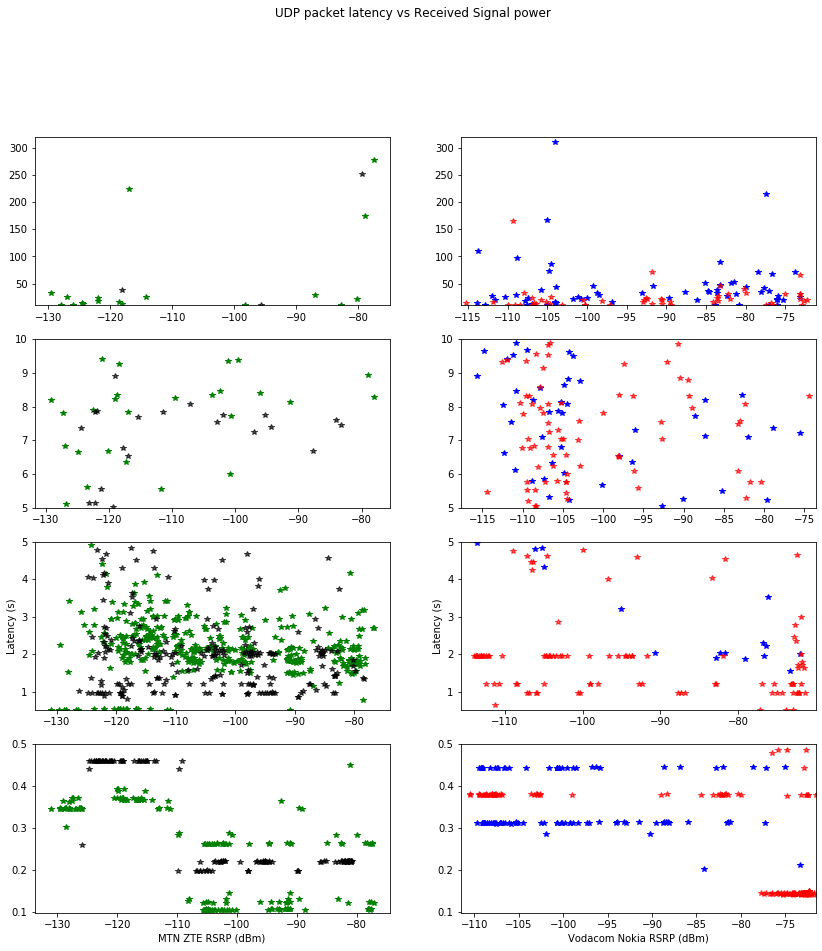

In [27]:
def thresh(a, key, split):
    a = np.array(a[key])
    r = a == a
    lim = [None, None]
    tsplit, slen = split
    if key == 'txTime':
        r *= a > 0
        limits = [320000, 10000, 5000, 500, 100]
        # r, lim = j.splitter(r, a, limits[1:-1], split)
        lim = [limits[tsplit+1], limits[tsplit]]
        r *= a < limits[tsplit]
        r *= a >= limits[tsplit+1]
    elif key == 'Signal power':
        r *= a > -1350
        # lim = [-1300, -700]
    return r, lim
compare(files, thresh, 'UDP packet latency vs Received Signal power', 'Latency (s)', 'RSRP (dBm)', 'txTime', 'Signal power', 1000, 10, split=4)

custom jupyter @DanielRobinson
10.0 320.0 0.0 52.5
5.0 10.0 0.0 8.4
0.5 5.0 0.0 45.15
0.1 0.5 0.0 93.45


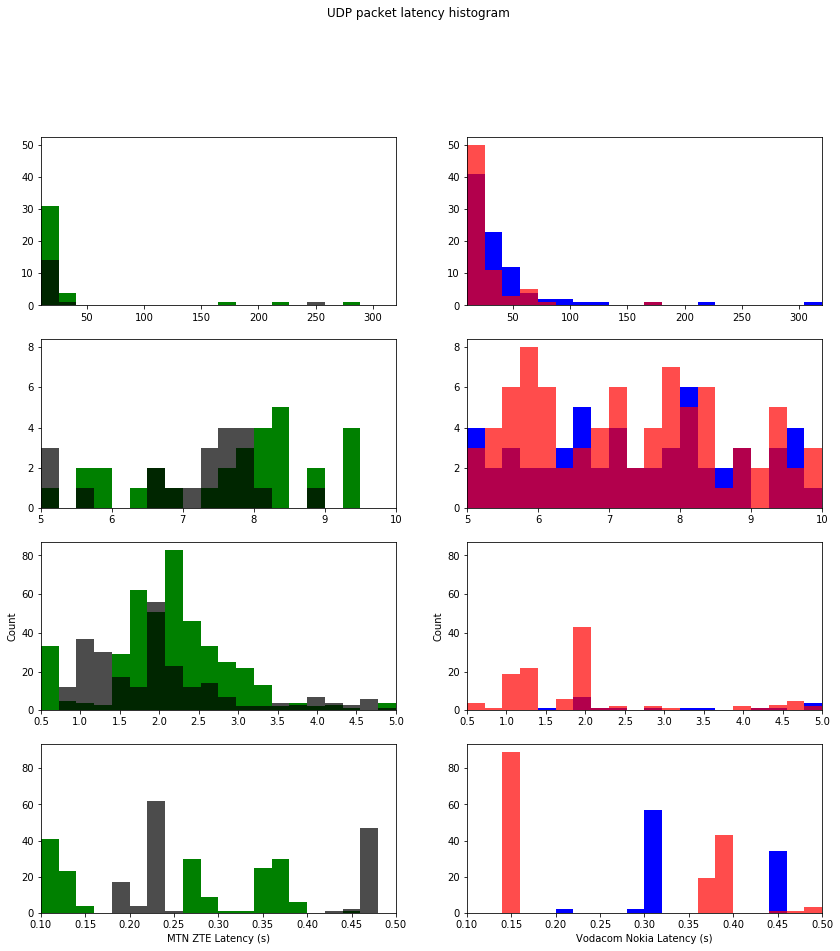

In [28]:
def thresh(a, key, split):
    a = np.array(a[key])
    r = a == a
    lim = [None, None]
    tsplit, slen = split
    if key == 'txTime':
        r *= a > 0
        limits = [320000, 10000, 5000, 500, 100]
        # r, lim = j.splitter(r, a, limits[1:-1], split)
        lim = [limits[tsplit+1], limits[tsplit]]
        r *= a < limits[tsplit]
        r *= a >= limits[tsplit+1]
#     elif key == 'Signal power':
#         r *= a > -1350
#         # lim = [-1300, -700]
    return r, lim
compare(files, thresh, 'UDP packet latency histogram', 'Count', 'Latency (s)', 'txTime', 'Signal power', 1000, 10, split=4, hist=True)

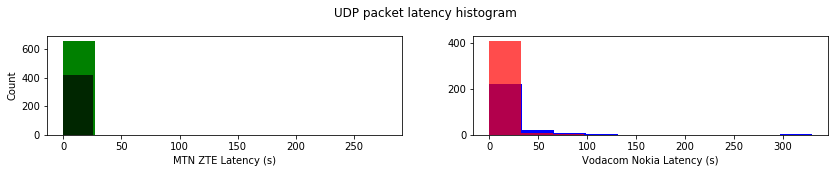

In [6]:
def thresh(a, key, split):
    a = np.array(a[key])
    r = a == a
    if key == 'txTime':
        r *= a > 100
#         if split == 0:
#             r *= a >= 10000
#         if split == 1:
#             r *= a >= 1000
#             r *= a < 10000
#         if split == 2:
#             r *= a < 1000
#     elif key == 'Signal power':
#         return a > -1450
    return r
compare('UDP packet latency histogram', 'Count', 'Latency (s)', 'txTime', 'Signal power', 1000, 10, 'all_nw', 'all', 1, True)